In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
data = {
    "HeartRate": [80, 130, 55, 95, 120, 140, 45, 100, 72, 88],
    "BloodPressure": [120, 150, 85, 135, 160, 180, 70, 130, 110, 100],
    "OxygenLevel": [98, 95, 88, 92, 89, 85, 82, 91, 97, 96],
    "Temperature": [36.8, 37.5, 38.0, 39.2, 40.0, 39.5, 36.5, 38.5, 36.9, 37.2],
    "Age": [25, 60, 45, 70, 68, 75, 50, 65, 30, 40],
    "ChestPain": [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
    "Dizziness": [0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
    "Unconscious": [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    "Alert": [0, 2, 3, 1, 3, 3, 3, 2, 0, 0]  # Labels
}

df = pd.DataFrame(data)

X = df.drop("Alert", axis=1)
y = df["Alert"]



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, random_state=42)

In [5]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
patient = [[110, 145, 89, 39.0, 65, 1, 1, 0]]  # Example patient
alert_level = clf.predict(patient)[0]

alert_map = {0: "Stable", 1: "Medium Risk", 2: "High Risk", 3: "Emergency"}
print("Patient Alert:", alert_map[alert_level])



Patient Alert: Emergency


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
feature_importance = dict(zip(X.columns, clf.feature_importances_))
print("Feature Importance:", feature_importance)


Feature Importance: {'HeartRate': np.float64(0.11169445434739553), 'BloodPressure': np.float64(0.1594337987720341), 'OxygenLevel': np.float64(0.23878542780748657), 'Temperature': np.float64(0.11721329966329964), 'Age': np.float64(0.15733387799564275), 'ChestPain': np.float64(0.06813453159041397), 'Dizziness': np.float64(0.09548611111111112), 'Unconscious': np.float64(0.05191849871261636)}


In [8]:
import math
import pandas as pd


# Sample dataset (categorical for ID3)
data = {
    "HeartRate": ["High", "High", "Normal", "Low", "Low"],
    "BloodPressure": ["High", "Normal", "High", "Low", "Low"],
    "OxygenLevel": ["Low", "Normal", "Normal", "Low", "Low"],
    "Temperature": ["Fever", "Normal", "Fever", "Normal", "Normal"],
    "Alert": ["High Risk", "Emergency", "Stable", "Emergency", "High Risk"]
}

df = pd.DataFrame(data)

# ---- ID3 Functions ----
def entropy(column):
    values, counts = zip(*column.value_counts().items())
    total = sum(counts)
    return -sum((count/total) * math.log2(count/total) for count in counts)

def info_gain(df, attribute, target):
    total_entropy = entropy(df[target])
    values = df[attribute].unique()
    weighted_entropy = 0
    for v in values:
        subset = df[df[attribute] == v]
        weighted_entropy += (len(subset)/len(df)) * entropy(subset[target])
    return total_entropy - weighted_entropy

def id3(df, target, attributes):
    # If all examples are same class → return leaf
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]

    # If no attributes left → return majority class
    if not attributes:
        return df[target].mode()[0]

    # Choose attribute with highest info gain
    gains = {attr: info_gain(df, attr, target) for attr in attributes}
    best_attr = max(gains, key=gains.get)

    tree = {best_attr: {}}
    for val in df[best_attr].unique():
        subset = df[df[best_attr] == val]
        tree[best_attr][val] = id3(subset, target, [a for a in attributes if a != best_attr])
    return tree

# ---- Train ID3 ----
attributes = ["HeartRate", "BloodPressure", "OxygenLevel", "Temperature"]
decision_tree = id3(df, "Alert", attributes)
print("Decision Tree (ID3):")
print(decision_tree)


{
 'OxygenLevel': {
     'Low': 'Emergency',
     'Normal': {
        'HeartRate': {
            'High': 'High Risk',
            'Normal': 'Stable'
        }
     }
  }
}





Decision Tree (ID3):
{'HeartRate': {'High': {'BloodPressure': {'High': 'High Risk', 'Normal': 'Emergency'}}, 'Normal': 'Stable', 'Low': {'BloodPressure': {'Low': {'OxygenLevel': {'Low': {'Temperature': {'Normal': 'Emergency'}}}}}}}}


{'OxygenLevel': {'Low': 'Emergency',
  'Normal': {'HeartRate': {'High': 'High Risk', 'Normal': 'Stable'}}}}

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np

# Sample dataset: [HeartRate, BP, SpO2, Temp]
# Labels: 0=Stable, 1=Medium Risk, 2=High Risk, 3=Emergency
X = np.array([
    [80, 120, 98, 36.8],   # Normal
    [130, 150, 95, 37.5],  # High HR & BP
    [60, 85, 88, 38.0],    # Low BP & SpO2
    [100, 130, 91, 39.2],  # Fever + borderline SpO2
    [45, 70, 85, 36.5]     # Critical low HR & SpO2
])
y = np.array([0, 2, 3, 1, 3])

# Train CART (Gini-based decision tree)
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf.fit(X, y)

# Print the CART tree rules
tree_rules = export_text(clf, feature_names=["HeartRate", "BP", "SpO2", "Temp"])
print(tree_rules)

# Predict for a new patient
patient = [[110, 145, 89, 39.0]]
alert_level = clf.predict(patient)[0]

alert_map = {0: "Stable", 1: "Medium Risk", 2: "High Risk", 3: "Emergency"}
print("Patient Alert:", alert_map[alert_level])






|--- SpO2 <= 89.50
|   |--- class: 3
|--- SpO2 >  89.50
|   |--- BP <= 125.00
|   |   |--- class: 0
|   |--- BP >  125.00
|   |   |--- SpO2 <= 93.00
|   |   |   |--- class: 1
|   |   |--- SpO2 >  93.00
|   |   |   |--- class: 2

Patient Alert: Emergency


In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Dataset: [HeartRate, BP, SpO2, Temp]
# Labels: 0=Stable, 1=Medium Risk, 2=High Risk, 3=Emergency
X = np.array([
    [80, 120, 98, 36.8],   # Normal
    [130, 150, 95, 37.5],  # High HR & BP
    [60, 85, 88, 38.0],    # Low BP & SpO2
    [100, 130, 91, 39.2],  # Fever + borderline SpO2
    [45, 70, 85, 36.5]     # Critical low HR & SpO2
])
y = np.array([0, 2, 3, 1, 3])

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=4, random_state=42)
clf.fit(X, y)

# Predict for a new patient
patient = [[110, 145, 89, 39.0]]
alert_level = clf.predict(patient)[0]

alert_map = {0: "Stable", 1: "Medium Risk", 2: "High Risk", 3: "Emergency"}
print("Patient Alert:", alert_map[alert_level])

# Check feature importance
print("Feature Importance:", dict(zip(["HeartRate", "BP", "SpO2", "Temp"], clf.feature_importances_)))



Patient Alert: Medium Risk
Feature Importance: {'HeartRate': np.float64(0.4158730158730158), 'BP': np.float64(0.2198412698412698), 'SpO2': np.float64(0.1357142857142857), 'Temp': np.float64(0.2285714285714285)}


In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# -----------------------------
# 1. Create a synthetic dataset
# -----------------------------
data = {
    "HeartRate": [80, 130, 55, 95, 120, 140, 45, 100, 72, 88],
    "BloodPressure": [120, 150, 85, 135, 160, 180, 70, 130, 110, 100],
    "OxygenLevel": [98, 95, 88, 92, 89, 85, 82, 91, 97, 96],
    "Temperature": [36.8, 37.5, 38.0, 39.2, 40.0, 39.5, 36.5, 38.5, 36.9, 37.2],
    "Age": [25, 60, 45, 70, 68, 75, 50, 65, 30, 40],
    "ChestPain": [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
    "Dizziness": [0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
    "Unconscious": [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    "Alert": [0, 2, 3, 1, 3, 3, 3, 2, 0, 0]  # Labels
}

df = pd.DataFrame(data)

X = df.drop("Alert", axis=1)
y = df["Alert"]

# -----------------------------
# 2. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 3. Train Random Forest
# -----------------------------
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# -----------------------------
# 4. Evaluate
# -----------------------------
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# -----------------------------
# 5. Predict New Patient
# -----------------------------
patient = [[110, 145, 89, 39.0, 65, 1, 1, 0]]  # Example patient
# Convert patient data to DataFrame with feature names
patient_df = pd.DataFrame(patient, columns=X_train.columns)
alert_level = clf.predict(patient_df)[0]

alert_map = {0: "Stable", 1: "Medium Risk", 2: "High Risk", 3: "Emergency"}
print("Patient Alert:", alert_map[alert_level])

# -----------------------------
# 6. Feature Importance
# -----------------------------
feature_importance = dict(zip(X.columns, clf.feature_importances_))
print("Feature Importance:", feature_importance)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Patient Alert: Emergency
Feature Importance: {'HeartRate': np.float64(0.11169445434739553), 'BloodPressure': np.float64(0.1594337987720341), 'OxygenLevel': np.float64(0.23878542780748657), 'Temperature': np.float64(0.11721329966329964), 'Age': np.float64(0.15733387799564275), 'ChestPain': np.float64(0.06813453159041397), 'Dizziness': np.float64(0.09548611111111112), 'Unconscious': np.float64(0.05191849871261636)}


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [0 0 1]]
Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1-score: 0.5555555555555555


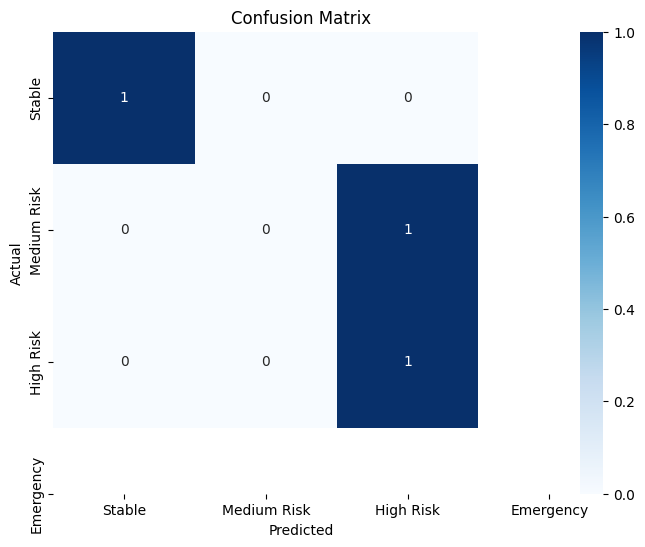

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Assuming the screenshot uses a different colormap and potentially different annotation style
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=alert_map.values(), yticklabels=alert_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()